## First locate the .abf file from your computer that needs to be converted, and convert it into an output file. New ipfx package would need to be installed first to accommodate for including channel list name as arguments.

In [11]:
from ipfx_new.ipfx_new.x_to_nwb import ABFConverter

abf_file_location = 'examples/' #locate the directory where the abf file is located
output_location = 'output/' #locate the directory where the converted nwb file should be stored
abf_file_name = '2020_09_04_0012.abf' #name of the abf file
channel_list_name = 'Vm_sec' #name of the channel of interest

ABFConverter.ABFConverter(abf_file_location + abf_file_name, output_location + abf_file_name[:-4] + '.nwb', includeChannelList=[channel_list_name])

## Loading converted nwb file into ipfx for feature extraction. Input the filename of the newly converted nwb file.

In [1]:
# Load IPFX libraries
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps
from ipfx.qc_feature_extractor import sweep_qc_features

# Load pandas library too
import pandas as pd
from ipfx.dataset.create import create_ephys_data_set
from ipfx.utilities import drop_failed_sweeps

file_name = "output/2020_09_04_0012.nwb" #input the location of the output nwb file of interest

# Create Ephys Data Set

print('loading dataset into data structure...')
#nwb_file_name = '/Users/stripathy/Downloads/sub-601462951_ses-601810292_icephys.nwb'
data_set = create_ephys_data_set(nwb_file=file_name, ontology="ipfx_new/ipfx_new/defaults/stimulus_ontology.json") ##loads nwb file into ipfx data structure

# sweep = data_set.sweep(0)
# sweep_features = sweep_qc_features(data_set)
# Drop failed sweeps: sweeps with incomplete recording or failing QC criteria
drop_failed_sweeps(data_set)
# ipfx.data_set_features.extract_data_set_features(data_set, subthresh_min_amp=None)[source]


loading dataset into data structure...


C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)


## Extracting featuring using ipfx toolset.

In [10]:
from ipfx.feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor

import ipfx.stimulus_protocol_analysis as spa
from ipfx.epochs import get_stim_epoch
import matplotlib.pyplot as plt


# get sweep table of Long Square sweeps
long_square_table = data_set.filtered_sweep_table(
    stimuli=data_set.ontology.long_square_names
)
long_square_sweeps = data_set.sweep_set(long_square_table.sweep_number)

long_square_sweeps = data_set.sweep_set()

# Select epoch corresponding to the actual recording from the sweeps
# and align sweeps so that the experiment would start at the same time
long_square_sweeps.select_epoch("recording")
# long_square_sweeps.align_to_start_of_epoch("experiment")

# find the start and end time of the stimulus
# (treating the first sweep as representative)
stim_start_index, stim_end_index = get_stim_epoch(long_square_sweeps.i[0], test_pulse=False)
stim_start_time = long_square_sweeps.t[0][stim_start_index]
stim_end_time = long_square_sweeps.t[0][stim_end_index]

stim_start_time = 0.2
stim_end_time = 1.8

# build the extractors
spfx = SpikeFeatureExtractor(start=stim_start_time, end=stim_end_time, filter = 1)
sptfx = SpikeTrainFeatureExtractor(start=stim_start_time, end=stim_end_time)

# run the analysis and print out a few of the features
long_square_analysis = spa.LongSquareAnalysis(spfx, sptfx, subthresh_min_amp=-100.0)
data = long_square_analysis.analyze(long_square_sweeps)

fields_to_print = [
    'tau',
    'v_baseline',
    'input_resistance',
    'vm_for_sag',
    'fi_fit_slope',
    'sag',
    'rheobase_i'
]

for field in fields_to_print:
    print("%s: %s" % (field, str(data[field])))

C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warning

tau: nan
v_baseline: -73.21795300074986
input_resistance: 247.53906249999943
vm_for_sag: -69.03076
fi_fit_slope: 0.0110902262684071
sag: 1.572859525680542
rheobase_i: 50.0


C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus_protocol_analysis.py:219: RuntimeWarning: Mean of empty slice
  features["tau"] = np.nanmean(calc_subthresh_features['tau'])


## Plotting the sweeps using ipfx toolset.

C:\Users\allen\anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: I-V curve ,-400 pA
  warnings.warn("Could not find stimulus: %s" % tag)


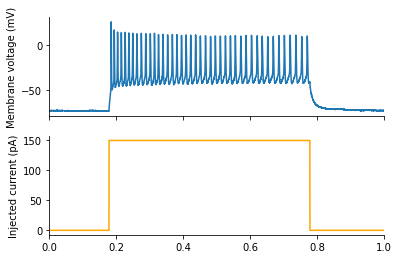

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# these are basic IPFX objects for working with sweeps and sets of sweeps
from ipfx.sweep import Sweep, SweepSet 

sweep_plot_index = 11 # which sweep number do you want to plot?

curr_sweep = data_set.sweep_set(sweep_plot_index).sweeps[0]
t = curr_sweep.t
v = curr_sweep.v
i = curr_sweep.i

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(t, v)
axes[0].set_xlim(0, 1)
axes[0].set_ylabel("Membrane voltage (mV)")

axes[1].plot(t, i, c="orange")
axes[1].set_ylabel("Injected current (pA)")

sns.despine()

## Plotting the sweeps using pyabf toolset.

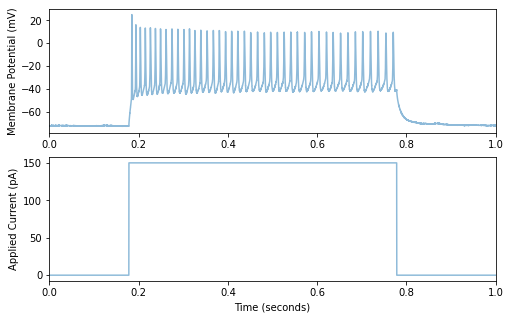

In [1]:
### Import statements
import pyabf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# refers to example_datasets folder in github repo
file_rel_path = 'examples/'

curr_file = '2020_09_04_0012.abf'
abf_file_path = file_rel_path + curr_file

abf = pyabf.ABF(abf_file_path) # this is the basic function for accessing abf files

### Configuration variables
stim_channel_num = 0 # on which channel number is the stimulus?
response_chan_num = 0 # on which channel number is the response?

stim_gain = 1 # integer gain on stimulus
response_gain = 1 # integer gain on response

stim_end = 1 # time point where stimulus ends

sweep_plot_list = [11] # sweeps we want to plot
fig = plt.figure(figsize=(8, 5))

### Figure plotting
for i in sweep_plot_list:
    sweep_num = i
    
    # this setSweep command sets the currently active sweep in the file
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    abf.setSweep(sweep_num, channel=stim_channel_num)
    ax2 = fig.add_subplot(212, sharex=ax1)  
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()